# MODIS LAI preprocessing

## Preprocesses MODIS LAI from 2002-2020

- clips to AOI
- creates monthly composite
- exports as netCDF

## Setup

In [1]:
# import packages
import xarray as xr

# load in data
# --------------------------------------------------------------------------------------------
# --------------------------------------------------------------------------------------------

# MODIS LAI 
# --------------------------

# import
lai_path = 'https://nyu1.osn.mghpcc.org/leap-pangeo-pipeline/MODIS_LAI/MODIS_LAI.zarr'
lai_xr = xr.open_dataset(lai_path, engine='zarr', chunks={})

# print
print(lai_xr.coords["lat"].values[:5]) #lat coordinates
print(lai_xr.coords["lon"].values[:5]) #lon coordinates
lai_xr
# visualize
# lai_xr.lai.isel(time=210).plot(figsize=(8,6))

# AOI 
# --------------------------

# manually set bounding box
lon_min = -73.489604265885
lon_max = -67.72178200026
lat_max = -9.106738678620076     # north
lat_min = -14.471148538041154    # south

[89.975 89.925 89.875 89.825 89.775]
[-179.975 -179.925 -179.875 -179.825 -179.775]


## Clip 


<xarray.Dataset> Size: 43MB
Dimensions:  (time: 874, lat: 107, lon: 116)
Coordinates:
  * time     (time) datetime64[ns] 7kB 2002-01-01 2002-01-09 ... 2020-12-26
  * lat      (lat) float32 428B -9.125 -9.175 -9.225 ... -14.33 -14.38 -14.43
  * lon      (lon) float32 464B -73.47 -73.42 -73.38 ... -67.82 -67.78 -67.72
Data variables:
    lai      (time, lat, lon) float32 43MB dask.array<chunksize=(100, 107, 30), meta=np.ndarray>
Attributes:
    citation:       [1] Lin, W., Yuan, H., Dai, Y. et al., 2022. Reprocessed ...
    contact:        Yuan, Hua (yuanh25@mail.sysu.edu.cn)
    creation_date:  20221119
    institution:    Land-Atmosphere Interaction Research Group at Sun Yat-sen...
    title:          LAI data sets for land surface and climate modelling
['2002-01-01T00:00:00.000000000' '2002-01-09T00:00:00.000000000'
 '2002-01-17T00:00:00.000000000' '2002-01-25T00:00:00.000000000'
 '2002-02-02T00:00:00.000000000' '2002-02-10T00:00:00.000000000'
 '2002-02-18T00:00:00.000000000' '2002-02

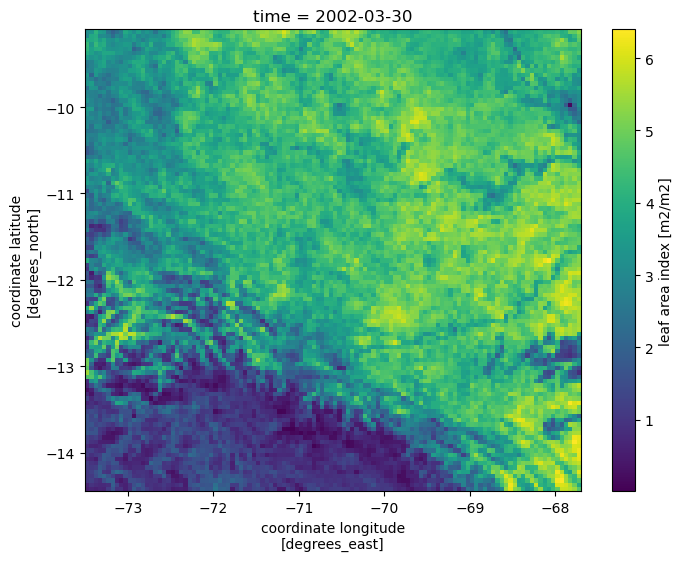

In [2]:
# clip the LAI data set to the AOI
lai_clip_xr = lai_xr.sel(
    lon=slice(lon_min, lon_max),
    lat=slice(lat_max, lat_min)   # because lat decreases from N → S
)

# print + visualize
print(lai_clip_xr)
lai_clip_xr.lai.isel(time=11).plot(figsize=(8,6))
# print(lai_clip_xr.time.values)

## Monthly Composite 


In [10]:
# create monthly composite
lai_clipMonthly_xr = lai_clip_xr.resample(time="1M").median()

# print
# print(lai_clipMonthly_xr)
print(lai_clipMonthly_xr.time.values)

/srv/conda/envs/notebook/lib/python3.12/site-packages/xarray/groupers.py:530: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


<xarray.Dataset> Size: 23MB
Dimensions:  (time: 228, lat: 107, lon: 116)
Coordinates:
  * time     (time) datetime64[ns] 2kB 2002-01-31 2002-02-28 ... 2020-12-31
  * lat      (lat) float32 428B -9.125 -9.175 -9.225 ... -14.33 -14.38 -14.43
  * lon      (lon) float32 464B -73.47 -73.42 -73.38 ... -67.82 -67.78 -67.72
Data variables:
    lai      (time, lat, lon) float64 23MB dask.array<chunksize=(1, 107, 30), meta=np.ndarray>
Attributes:
    citation:       [1] Lin, W., Yuan, H., Dai, Y. et al., 2022. Reprocessed ...
    contact:        Yuan, Hua (yuanh25@mail.sysu.edu.cn)
    creation_date:  20221119
    institution:    Land-Atmosphere Interaction Research Group at Sun Yat-sen...
    title:          LAI data sets for land surface and climate modelling
['2002-01-31T00:00:00.000000000' '2002-02-28T00:00:00.000000000'
 '2002-03-31T00:00:00.000000000' '2002-04-30T00:00:00.000000000'
 '2002-05-31T00:00:00.000000000' '2002-06-30T00:00:00.000000000'
 '2002-07-31T00:00:00.000000000' '2002-08-3

## Export


In [20]:
# Export to a new Zarr directory
output_path = "/home/jovyan/MLEAEEE4000-DroughtAmazon2/data/modisLAI/MODIS_LAI_monthly.nc"
lai_clipMonthly_xr.to_netcdf(output_path)